In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv('Titanic_ds.csv')

In [85]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [86]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [87]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [89]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
df['Embarked'].fillna(df['Embarked'].mode(),inplace = True)


In [62]:
df['Age'].fillna(df['Age'].median(),inplace = True)

In [63]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1, inplace = True)

In [64]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [65]:
df['Sex'] = df['Sex'].map({'male':1,'female':0})

In [66]:
df['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [67]:
df['Embarked'] = df['Embarked'].map({'S':1,'C':2,'Q':3})

In [68]:
df['Embarked'].head()

0    1.0
1    2.0
2    1.0
3    1.0
4    1.0
Name: Embarked, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
from sklearn.linear_model import LogisticRegression


In [73]:
model = LogisticRegression(max_iter=1000)

In [75]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [76]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [81]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace = True)

In [82]:
df['Embarked'].isnull().sum()

0

In [91]:
X_train.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
dtype: object

In [92]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [93]:
X_train['Embarked'].fillna(X_train['Embarked'].mode()[0],inplace = True)

In [94]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [95]:
y_pred = model.predict(X_test)


In [96]:
y_prob = model.predict_proba(X_test)[:,1]

In [97]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [98]:
y_prob

array([0.09418108, 0.22588603, 0.13536097, 0.89019304, 0.69916048,
       0.93458438, 0.71553376, 0.09057998, 0.78523037, 0.92593551,
       0.34491064, 0.0690096 , 0.38196798, 0.12504991, 0.20095021,
       0.94033585, 0.31026508, 0.71557989, 0.24976456, 0.34221346,
       0.12141307, 0.42040387, 0.61187397, 0.13579698, 0.11057492,
       0.06944171, 0.42991869, 0.22713954, 0.08254208, 0.59485   ,
       0.13904026, 0.66021476, 0.52506098, 0.61696373, 0.1428673 ,
       0.10582463, 0.4729006 , 0.71553376, 0.93215781, 0.10872978,
       0.20661768, 0.08015569, 0.10877255, 0.15989118, 0.52213308,
       0.09460504, 0.13913021, 0.12519308, 0.12115511, 0.31012419,
       0.67771487, 0.81570073, 0.04205608, 0.5396901 , 0.05666871,
       0.93760015, 0.22048282, 0.92525813, 0.77818957, 0.76910806,
       0.13170548, 0.86246486, 0.76580409, 0.46607574, 0.15989118,
       0.63168141, 0.32306322, 0.10574051, 0.12523847, 0.85409327,
       0.75887118, 0.94529603, 0.5400812 , 0.88949908, 0.12476

In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve,classification_report
import seaborn as sns


In [100]:
accuracy = accuracy_score(y_test, y_pred)

In [101]:
accuracy

0.7988826815642458

In [102]:
cm = confusion_matrix(y_test, y_pred)

In [103]:
print(f'Confusion Matrix:\n',cm)

Confusion Matrix:
 [[89 16]
 [20 54]]


In [104]:
report = classification_report(y_test, y_pred)


In [105]:
report

'              precision    recall  f1-score   support\n\n           0       0.82      0.85      0.83       105\n           1       0.77      0.73      0.75        74\n\n    accuracy                           0.80       179\n   macro avg       0.79      0.79      0.79       179\nweighted avg       0.80      0.80      0.80       179\n'

In [108]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)


In [109]:
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.01904762, 0.01904762,
        0.01904762, 0.01904762, 0.02857143, 0.02857143, 0.03809524,
        0.03809524, 0.04761905, 0.04761905, 0.07619048, 0.07619048,
        0.12380952, 0.12380952, 0.16190476, 0.16190476, 0.17142857,
        0.17142857, 0.19047619, 0.19047619, 0.20952381, 0.20952381,
        0.26666667, 0.26666667, 0.28571429, 0.28571429, 0.36190476,
        0.36190476, 0.43809524, 0.45714286, 0.47619048, 0.47619048,
        0.51428571, 0.51428571, 0.67619048, 0.67619048, 0.73333333,
        0.77142857, 0.82857143, 0.82857143, 0.84761905, 0.84761905,
        0.96190476, 0.96190476, 1.        ]),
 array([0.        , 0.01351351, 0.48648649, 0.48648649, 0.54054054,
        0.56756757, 0.58108108, 0.58108108, 0.59459459, 0.59459459,
        0.64864865, 0.64864865, 0.67567568, 0.67567568, 0.68918919,
        0.68918919, 0.72972973, 0.72972973, 0.77027027, 0.77027027,
        0.78378378, 0.78378378, 0.83783784, 0.83783784, 0.85135135,
  

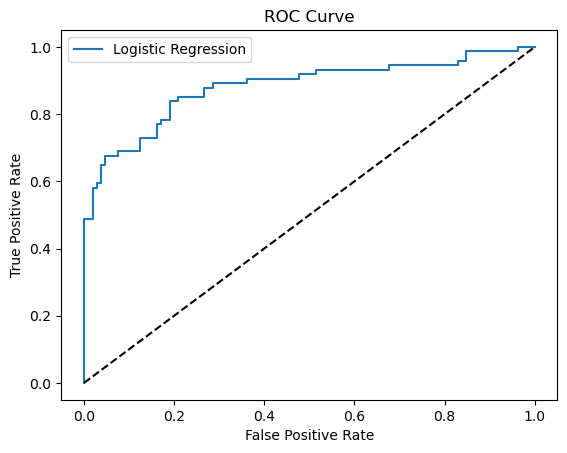

In [110]:
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [111]:
auc_score = roc_auc_score(y_test, y_prob)
print(f'AUC Score: {auc_score}')

AUC Score: 0.8808236808236808


In [112]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5)

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')


Cross-Validation Scores: [nan nan nan nan nan]
Mean CV Score: nan


C:\Users\simha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\simha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\simha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1508, in fit
    X, y = self._validate_data(
  File "C:\Users\simha\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\simha\anaconda3\lib

In [113]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [114]:
X['Embarked'].fillna(X['Embarked'].mode()[0],inplace = True)

In [115]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [116]:
X.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
dtype: object

In [117]:
y.dtypes

dtype('int64')

In [118]:
y.isnull().sum()

0

In [119]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5)

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')


Cross-Validation Scores: [0.79329609 0.79213483 0.78651685 0.76966292 0.8258427 ]
Mean CV Score: 0.7934906785512524


In [121]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy}')

Random Forest Accuracy: 0.8212290502793296


In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [123]:
scaler

StandardScaler()

In [124]:
X_train_scaled

array([[-1.61413602,  0.7243102 ,  1.25364106, ..., -0.47934164,
        -0.07868358, -0.54803535],
       [-0.40055118,  0.7243102 , -0.47728355, ..., -0.47934164,
        -0.37714494, -0.54803535],
       [ 0.81303367,  0.7243102 ,  0.21508629, ..., -0.47934164,
        -0.47486697, -0.54803535],
       ...,
       [ 0.81303367,  0.7243102 ,  0.90745614, ..., -0.47934164,
        -0.35580399, -0.54803535],
       [-1.61413602, -1.38062393, -1.1696534 , ...,  2.04874166,
         1.68320121, -0.54803535],
       [-1.61413602,  0.7243102 , -0.63114352, ...,  0.78470001,
         0.86074761, -0.54803535]])

In [125]:
X_test_scaled

array([[ 0.81303367,  0.7243102 , -0.09263364, ...,  0.78470001,
        -0.33390078,  1.04462249],
       [-0.40055118,  0.7243102 ,  0.13815631, ..., -0.47934164,
        -0.42528387, -0.54803535],
       [ 0.81303367,  0.7243102 , -0.7080735 , ..., -0.47934164,
        -0.47486697, -0.54803535],
       ...,
       [ 0.81303367, -1.38062393,  0.67666619, ...,  5.8408666 ,
        -0.02308312, -0.54803535],
       [-0.40055118, -1.38062393, -0.93886345, ..., -0.47934164,
        -0.42528387, -0.54803535],
       [ 0.81303367, -1.38062393, -1.93895323, ...,  0.78470001,
        -0.30589933, -0.54803535]])

In [126]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)


In [127]:

from sklearn.metrics import accuracy_score
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)}")


Logistic Regression Accuracy: 0.7988826815642458


In [129]:
from sklearn.metrics import classification_report

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


y_pred_rf = RandomForestClassifier().fit(X_train, y_train).predict(X_test)  # Using original data for RF
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [130]:
from sklearn.model_selection import cross_val_score


lr_cv_scores = cross_val_score(LogisticRegression(max_iter=200), X_train_scaled, y_train, cv=5)
print(f'Logistic Regression CV Accuracy: {lr_cv_scores.mean()}')


rf_cv_scores = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=5)
print(f'Random Forest CV Accuracy: {rf_cv_scores.mean()}')



Logistic Regression CV Accuracy: 0.7906628582684921
Random Forest CV Accuracy: 0.7921501034177091


In [131]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5)
grid_search_lr.fit(X_train_scaled, y_train)

print(f'Best Parameters for Logistic Regression: {grid_search_lr.best_params_}')
print(f'Best CV Score: {grid_search_lr.best_score_}')


Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Best CV Score: 0.7977051117896188


In [132]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(), param_dist, cv=5)
random_search_rf.fit(X_train, y_train)

print(f'Best Parameters for Random Forest: {random_search_rf.best_params_}')
print(f'Best CV Score: {random_search_rf.best_score_}')


Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 10}
Best CV Score: 0.8229981286319316


In [133]:
rf_model = random_search_rf.best_estimator_  # Get the best model
feature_importances = rf_model.feature_importances_
features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(features)


    Feature  Importance
1       Sex    0.392203
5      Fare    0.210476
2       Age    0.165412
0    Pclass    0.109563
3     SibSp    0.050548
4     Parch    0.039937
6  Embarked    0.031861


In [134]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(
    estimators=[('lr', grid_search_lr.best_estimator_), ('rf', random_search_rf.best_estimator_)],
    voting='soft'
)
voting_model.fit(X_train_scaled, y_train)
voting_accuracy = voting_model.score(X_test_scaled, y_test)
print(f'Voting Classifier Accuracy: {voting_accuracy}')


Voting Classifier Accuracy: 0.8044692737430168


In [135]:
from sklearn.preprocessing import StandardScaler
import joblib


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 


joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [138]:
new_data = pd.DataFrame({
    'Age': [35, 25],                  
    'Fare': [100, 75],                
    'Pclass': [1, 1],                 
    'Sex': ['female', 'female'],      
    'SibSp': [2, 1],                  
    'Parch': [0, 0],                  
    'Embarked': [1, 1]              
})


In [139]:
new_data

,Age,Fare,Pclass,Sex,SibSp,Parch,Embarked
0,35,100,1,female,2,0,1
1,25,75,1,female,1,0,1
